# Predicting Rice Prices Using Decision Tree Algorithm

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the dataset
df=pd.read_csv("D:/ML_assessment4/imputed_processed_data.csv")
df

,date,price,anuradhapura_producer_price,kurunegala_producer_price,polonnaruwa_producer_price,production,production_total,exchange_rate,fuel_price,m0,m2,m1,m2b
0,1/1/1996,18.07,7.75,7.900,8.18,1333.600,2065.100,53.685,12.4,77071,228090,73783,260481
1,2/1/1996,18.70,8.17,8.260,8.76,1333.600,2065.100,53.685,12.4,79586,234199,77440,269496
2,3/1/1996,18.49,7.95,7.850,7.99,1333.600,2065.100,53.685,12.4,82915,239178,81796,272552
3,4/1/1996,18.52,8.25,8.010,8.29,1333.600,2065.100,54.735,12.4,80873,241893,79478,278425
4,5/1/1996,19.02,8.38,8.500,8.34,731.500,2065.100,54.950,12.4,83410,242072,76620,277365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,8/1/2022,239.24,112.60,113.863,122.93,1461.675,3392.875,357.880,430.0,1386248,10285938,1534114,11986911
320,9/1/2022,228.44,110.50,108.008,117.00,1461.675,3392.875,365.500,430.0,1378579,10351444,1528595,12051480
321,10/1/2022,224.78,105.48,106.740,109.50,1931.200,3392.875,363.000,430.0,1341681,10338384,1456688,12045719
322,11/1/2022,222.28,98.40,101.900,103.48,1931.200,3392.875,368.500,430.0,1318493,10416961,1457977,12162934


Decision Tree Regressor - MSE: 16.58165271983029, MAE: 2.7509637363265296, RMSE: 4.072057553599936, R2: 0.9908256843465303


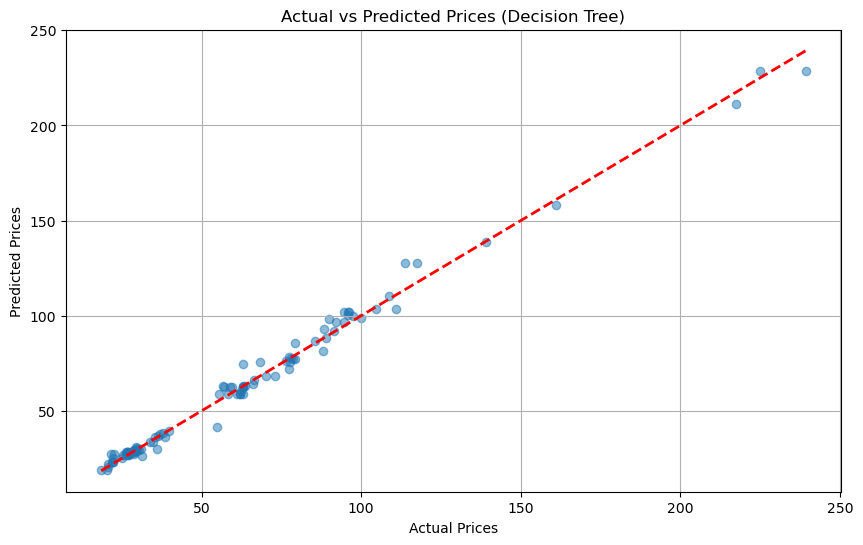

In [4]:
# Extract features and target variable, excluding monetary aggregates
features = df.drop(columns=['price', 'date', 'm0', 'm1', 'm2', 'm2b'])
target = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree Regressor model
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Output the performance metrics
print(f"Decision Tree Regressor - MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2: {r2}")

# Scatter plot of Actual vs Predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Prices (Decision Tree)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.grid(True)
plt.show()